In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /home/annaj/codebase/learn_d2l/chap3
Added /home/annaj/codebase/learn_d2l to Python path


In [2]:
import torch

In [3]:
import importlib
import d2l.regression as regression
from d2l.regression import SyntheticRegressionDataTorch, LinearRegressionTorch, LinearRegressionTorchL2

importlib.reload(regression)

<module 'd2l.regression' from '/home/annaj/codebase/learn_d2l/d2l/regression.py'>

In [4]:
rng = torch.Generator().manual_seed(42)

In [5]:
w = torch.ones(200) * 0.01
b = torch.ones(1) * 0.05

In [6]:
reg_data = SyntheticRegressionDataTorch(w=w, b=b, rng=rng, num_train=20, num_test=200)

In [7]:
model = LinearRegressionTorch(num_features=200, lr=0.003, rng=rng)
model_l2 = LinearRegressionTorchL2(num_features=200, lr=0.003, weight_decay=3, rng=rng)

In [9]:
all_epochs_losses = model.train(reg_data.get_train_dataloader_epochs(32, 100))
all_epochs_losses_l2 = model_l2.train(reg_data.get_train_dataloader_epochs(32, 100))

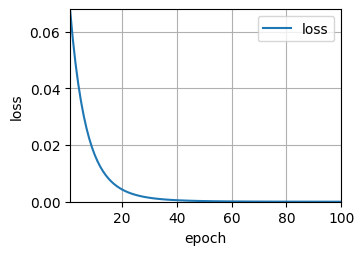

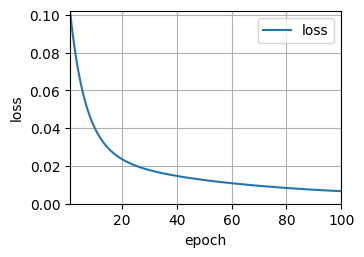

In [11]:
model.plot_loss(all_epochs_losses)
model_l2.plot_loss(all_epochs_losses_l2)

In [ ]:
mse = model.test(reg_data.get_test_data())
mse_l2 = model_l2.test(reg_data.get_test_data())

print(f"Test MSE without L2 regularization: {mse:.6f}")
print(f"Test MSE with L2 regularization: {mse_l2:.6f}")

Test MSE without L2 regularization: 0.040154
Test MSE with L2 regularization: 0.029157
